In [51]:
%matplotlib inline

#Importing Modules
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

In [6]:
# Reading Data
df = pd.read_csv('~/Documents/Kaggle/kaggle_fa16/datasets/houseprice/train.csv')

RMSE --> after log-transformed

log(x+1)

to submit to kaggle, do e^x to get back original values

Columns that are not too pertinent: Street, Utilities, RoofMatl

# Exploring Lot Area Variable

### First we look at the entire graph of lot area vs sales price

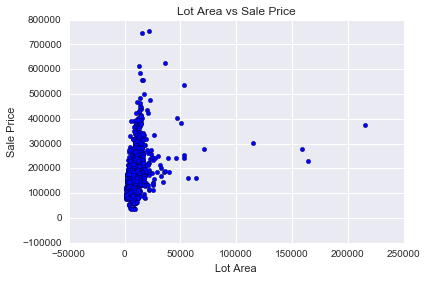

In [34]:
#Scatter plot of Lot area vs Sales price
plt.scatter(x = df['LotArea'], y = df['SalePrice'])
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

### Weed out outliers with a function and try graphing again

#Make a copy
df_copy = df.copy(deep = True)

#Method to delete outliers
#Outlier defined as above one SD of the data
#def reject_outliers(data):
    #m = np.mean(data)
    #sd = np.std(data)
    #filtered = [n for n in data if (m - sd < n < m + sd)]
    #return filtered     
df_copy[np.abs(df_copy['LotArea']-np.mean(df_copy['LotArea']))<=(0.2 * np.std(df_copy['LotArea']))]
for i in df_copy['LotArea']:
    print(i>50000)
#Apply to two variables
#lot_area_fixed =reject_outliers(df2['LotArea'])
#sale_price_fixed = reject_outliers(df2['SalePrice'])

#Graph again
#plt.scatter(x = df_copy['LotArea'], y = df_copy['SalePrice'])
#plt.title('Lot Area vs Sale Price')
#plt.xlabel('Lot Area')
#plt.ylabel('Sale Price')
#plt.xlim((0,250000))
#plt.ylim((0,800000))


## OK that didn't work, let's try running a linear regression on it first

In [52]:
house_y = df['SalePrice']
house_x = df.drop(['SalePrice'], axis = 1)
result = sm.OLS(house_y, house_x).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).